In [1]:
# importing major libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('LA4Schools.csv')

In [3]:
df.head()

,StudentID,TextLevel-01-SOY,TextLevel-01-MOY,TextLevel-01-EOY,TextLevel-02-SOY,TextLevel-02-MOY,TextLevel-02-EOY,WritingVocab-01-SOY,HRSIW-01-SOY,Counting-01,...,NCCD-Funded,NumSibling,SiblingOrder,01.SES,02.SES,NumAbvYear9,NumAbvDiploma,NumProf,Year_02,At_Risk_Numeracy
0,384710734,16,18,25,25,30,32,20,49,4,...,0,3,3,104,104,2,1,2,2020,False
1,504699264,8,12,17,19,18,21,40,37,2,...,0,2,2,112,112,2,2,2,2018,False
2,332227462,8,12,18,18,23,22,6,30,2,...,0,2,2,120,109,2,0,0,2021,False
3,245262793,11,16,25,27,26,31,41,30,2,...,0,2,1,95,93,0,0,0,2021,False
4,331173944,9,12,17,21,24,26,26,32,2,...,0,1,1,98,98,2,0,0,2021,False


In [4]:
df.shape

(2000, 34)

We have 2000 rows and 34 columns

In [5]:
df.duplicated().sum()

# no duplicate entries recorded

np.int64(0)

In [6]:
# seeking information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   StudentID                       2000 non-null   int64  
 1   TextLevel-01-SOY                2000 non-null   int64  
 2   TextLevel-01-MOY                2000 non-null   int64  
 3   TextLevel-01-EOY                2000 non-null   int64  
 4   TextLevel-02-SOY                2000 non-null   int64  
 5   TextLevel-02-MOY                2000 non-null   int64  
 6   TextLevel-02-EOY                2000 non-null   int64  
 7   WritingVocab-01-SOY             2000 non-null   int64  
 8   HRSIW-01-SOY                    2000 non-null   int64  
 9   Counting-01                     2000 non-null   int64  
 10  Counting-02                     2000 non-null   int64  
 11  Place Value-01                  2000 non-null   int64  
 12  Place Value-02                  20

# Info

- Our dataset is free from any type of null values
- We have around 2000 and 34 columns
- We have 33 numerical columns and 1 object type

# Data Card

### **Student Information**

* **StudentID**: Unique anonymized identifier.
* **Year3\_Writing\_At\_Risk**: Boolean flag (True/False) indicating writing risk in Year 3 NAPLAN based on performance.


### **Student Demographics**

* **Gender**: Male or Female.
* **Year\_02**: Year student enters Year 2.
* **Kinder\_Age**: Age in Kindergarten.
* **Disability**: Type of disability (Non-disable, Cognitive, Physical, Sensory, Social-Emotional).
* **NCCD\_funded**: Whether student receives funding under the National Disability program.


### **School Characteristics**

* **01.SES**: Socio-Economic Status of school in Year 1.
* **02.SES**: Socio-Economic Status of school in Year 2.


### **Family Background**

* **NumSibling**: Number of siblings.
* **SiblingOrder**: Birth order of the student.
* **Education**: Number of parents with education above Year 9 (0, 1, or 2).
* **Qualification**: Number of parents with qualification above diploma (0, 1, or 2).
* **Occupation**: Number of parents in professional-level jobs (0, 1, or 2).


### **Student Assessments**

#### **Literacy-Oriented Assessments**

* **TextLevel-Y1/Y2-SOY/MOY/EOY**: Text reading level assessed at Start, Middle, and End of Year 1 and 2 (0–31 scale).
* **WritingVocab-01-SOY**: Assesses vocabulary at start of Year 1.
* **Clay-Y1**: Results from Clay literacy test in Year 1.
* **HRSIW-01-SOY**: Hearing and Recording Sounds in Words—tests phonemic awareness at start of Year 1.

#### **Numeracy-Oriented Assessments**

Each scored from 0 to 6:

* **Counting-Y1, Counting-Y2**: Understanding of counting sequences.
* **PlaceValue-Y1, PlaceValue-Y2**: Understanding of multi-digit numbers.
* **AdditionSubtraction-Y1, AdditionSubtraction-Y2**: Addition and subtraction skills.
* **MultiplicationDivision-Y1, MultiplicationDivision-Y2**: Multiplication and division understanding.


In [7]:
pd.set_option('display.max_columns',None)
df.head()

,StudentID,TextLevel-01-SOY,TextLevel-01-MOY,TextLevel-01-EOY,TextLevel-02-SOY,TextLevel-02-MOY,TextLevel-02-EOY,WritingVocab-01-SOY,HRSIW-01-SOY,Counting-01,Counting-02,Place Value-01,Place Value-02,Addition and Subtraction-01,Addition and Subtraction-02,Multiplication and Division-01,Multiplication and Division-02,Kinder_Age,Gender,Disability_Non-disable,Disability_Cognitive,Disability_Physical,Disability_Sensory,Disability_SocialEmotional,NCCD-Funded,NumSibling,SiblingOrder,01.SES,02.SES,NumAbvYear9,NumAbvDiploma,NumProf,Year_02,At_Risk_Numeracy
0,384710734,16,18,25,25,30,32,20,49,4,5,2,2,2,4,2,2,5.493151,Male,1,0,0,0,0,0,3,3,104,104,2,1,2,2020,False
1,504699264,8,12,17,19,18,21,40,37,2,1,1,1,2,3,0,2,5.775342,Female,1,0,0,0,0,0,2,2,112,112,2,2,2,2018,False
2,332227462,8,12,18,18,23,22,6,30,2,1,1,2,2,1,2,1,5.923288,Male,1,0,0,0,0,0,2,2,120,109,2,0,0,2021,False
3,245262793,11,16,25,27,26,31,41,30,2,3,1,2,1,5,2,2,5.695890,Male,1,0,0,0,0,0,2,1,95,93,0,0,0,2021,False
4,331173944,9,12,17,21,24,26,26,32,2,4,2,2,2,4,1,1,5.764384,Male,1,0,0,0,0,0,1,1,98,98,2,0,0,2021,False


In [13]:
# finding out hot encoded varibles
ohe_var = []
for i in df.columns:
  # print(i)
  if df[i].min()==0 and df[i].max()==1:
      ohe_var.append(i)

ohe_var

['Disability_Non-disable',
 'Disability_Cognitive',
 'Disability_Physical',
 'Disability_Sensory',
 'Disability_SocialEmotional',
 'NCCD-Funded',
 'At_Risk_Numeracy']

In [8]:
df.columns

Index(['StudentID', 'TextLevel-01-SOY', 'TextLevel-01-MOY', 'TextLevel-01-EOY',
       'TextLevel-02-SOY', 'TextLevel-02-MOY', 'TextLevel-02-EOY',
       'WritingVocab-01-SOY', 'HRSIW-01-SOY', 'Counting-01', 'Counting-02',
       'Place Value-01', 'Place Value-02', 'Addition and Subtraction-01',
       'Addition and Subtraction-02', 'Multiplication and Division-01',
       'Multiplication and Division-02', 'Kinder_Age', 'Gender',
       'Disability_Non-disable', 'Disability_Cognitive', 'Disability_Physical',
       'Disability_Sensory', 'Disability_SocialEmotional', 'NCCD-Funded',
       'NumSibling', 'SiblingOrder', '01.SES', '02.SES', 'NumAbvYear9',
       'NumAbvDiploma', 'NumProf', 'Year_02', 'At_Risk_Numeracy'],
      dtype='object')


### **Student ID & Target Variable**

* `StudentID`: Unique identifier for each student.
* `At_Risk_Numeracy`: Target variable indicating whether the student is **at risk** of underperforming in **Year 3 numeracy** (True/False).



### **Literacy Skills – TextLevel (Reading Proficiency)**

* `TextLevel-01-SOY`, `TextLevel-01-MOY`, `TextLevel-01-EOY`: Start, Middle, and End of Year 1
* `TextLevel-02-SOY`, `TextLevel-02-MOY`, `TextLevel-02-EOY`: Start, Middle, and End of Year 2

### **Other Literacy Assessments**

* `WritingVocab-01-SOY`: Writing Vocabulary test at start of Year 1
* `HRSIW-01-SOY`: Hearing and Recording Sounds in Words at start of Year 1


### **Numeracy Skills**

* `Counting-01`, `Counting-02`: Year 1 and 2
* `Place Value-01`, `Place Value-02`: Year 1 and 2
* `Addition and Subtraction-01`, `Addition and Subtraction-02`: Year 1 and 2
* `Multiplication and Division-01`, `Multiplication and Division-02`: Year 1 and 2


### **Demographics**

* `Kinder_Age`: Age when starting Kindergarten
* `Gender`: Male or Female

### **Disability (One-Hot Encoded)**

* `Disability_Non-disable`
* `Disability_Cognitive`
* `Disability_Physical`
* `Disability_Sensory`
* `Disability_SocialEmotional`
* `NCCD-Funded`: Whether the student receives government disability funding


### **Family Background**

* `NumSibling`: Number of siblings
* `SiblingOrder`: Birth order
* `NumAbvYear9`: Number of parents educated above Year 9 (0, 1, or 2)
* `NumAbvDiploma`: Number of parents with qualifications above Diploma
* `NumProf`: Number of parents in professional occupations


### **School Characteristics**

* `01.SES`: School SES score in Year 1
* `02.SES`: School SES score in Year 2


### **Enrollment**

* `Year_02`: The calendar year the student entered Year 2


In [9]:
df.describe()

,StudentID,TextLevel-01-SOY,TextLevel-01-MOY,TextLevel-01-EOY,TextLevel-02-SOY,TextLevel-02-MOY,TextLevel-02-EOY,WritingVocab-01-SOY,HRSIW-01-SOY,Counting-01,Counting-02,Place Value-01,Place Value-02,Addition and Subtraction-01,Addition and Subtraction-02,Multiplication and Division-01,Multiplication and Division-02,Kinder_Age,Disability_Non-disable,Disability_Cognitive,Disability_Physical,Disability_Sensory,Disability_SocialEmotional,NCCD-Funded,NumSibling,SiblingOrder,01.SES,02.SES,NumAbvYear9,NumAbvDiploma,NumProf,Year_02
count,2.000000e+03,2000.00000,2000.000000,2000.0000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.459580e+08,10.69900,15.001500,21.1300,21.786500,24.07300,26.998500,22.018500,30.508000,1.758000,2.850500,1.028500,1.681500,1.290500,2.257500,1.075500,1.797500,5.276805,0.690500,0.234500,0.033500,0.005000,0.036500,0.089000,2.356500,1.748500,102.9415,102.117500,1.564000,0.886500,0.766500,2018.640000
std,2.580928e+08,6.10082,5.489496,4.5786,5.220205,4.69134,3.765314,12.679098,10.020686,0.935881,1.072719,0.529932,0.639736,0.935172,1.155795,0.837944,0.771875,0.347251,0.462403,0.423792,0.179983,0.070551,0.187578,0.284815,0.993932,0.865229,9.3859,9.150167,0.725374,0.837836,0.811977,1.664568
min,1.006692e+08,-4.00000,0.000000,4.0000,2.000000,5.00000,5.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.504110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,78.0000,78.000000,0.000000,0.000000,0.000000,2016.000000
25%,3.163839e+08,6.00000,11.000000,18.0000,18.000000,21.00000,25.000000,13.000000,25.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,5.015753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,95.0000,95.000000,1.000000,0.000000,0.000000,2017.000000
50%,5.469370e+08,10.00000,14.000000,21.0000,22.000000,24.00000,28.000000,20.000000,32.000000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,5.282192,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,101.0000,101.000000,2.000000,1.000000,1.000000,2018.000000
75%,7.670611e+08,14.00000,18.000000,24.0000,25.000000,28.00000,30.000000,29.000000,37.000000,2.000000,4.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,5.534247,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,113.0000,109.000000,2.000000,2.000000,1.000000,2020.000000
max,9.998723e+08,34.00000,33.000000,34.0000,36.000000,34.00000,33.000000,95.000000,58.000000,5.000000,6.000000,4.000000,5.000000,5.000000,6.000000,4.000000,5.000000,6.534247,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,6.000000,120.0000,120.000000,3.000000,2.000000,2.000000,2021.000000


# Accessing Data
- Mean increase over time: TextLevel-01-SOY: ~10.7 → TextLevel-02-EOY: ~27.0
- kinder age 5.27 aligns with standard starting age in Australia
- all numeracy scores (`Counting, Place Value, Addition and Subtraction, Multiplication and Division`) are between range of 0-6
- Scores improve from year 1 to 2 indicating learning progress
- **69% of students are not disabled** concluding 31% of Students are disabled
- 23% with Cognitive Disablity
- 3% with Physical Disablity
- less tahn 1% with sensory disablity
- 3% with social emotional disablity
- **Only 8.9% receive disablity fund**
- max 7 in NumSibling (high Variance)
- sibling order mostly 1st and 2nd born
- `NumAbvYear9	NumAbvDiploma	NumProf` most students have atleast 1 educated/qualified/profession parent
- SES - ranges from 78-120
### **ISSUES**
- TextLevel-01-SOY: Min = -4, HRSIW-01-SOY: Min = -3 → These are invalid scores (should be ≥0).
- SES Scores beyond 100

In [17]:
df.columns
df.At_Risk_Numeracy.value_counts()

,count
At_Risk_Numeracy,
False,1500
True,500


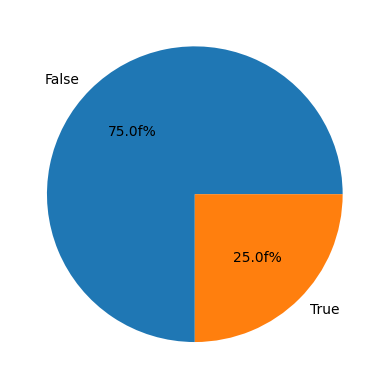

In [19]:
plt.pie(df.At_Risk_Numeracy.value_counts(),labels=df.At_Risk_Numeracy.value_counts().index,autopct='%1.1ff%%')
plt.show()

One in four students is not meeting the expected standards in the NAPLAN assessment.